In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
fuel_consumption = pd.read_csv('FuelEconomy.csv')

In [6]:
fuel_consumption.head(5)

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [7]:
fuel_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [8]:
fuel_consumption.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


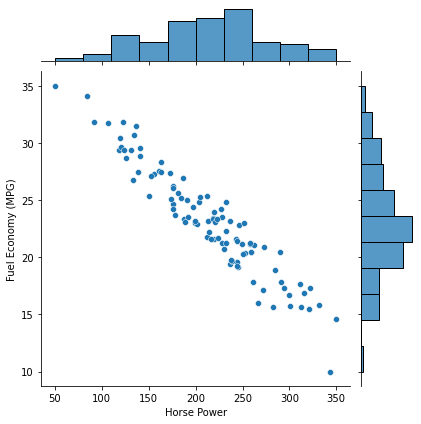

In [9]:
sns.jointplot(x='Horse Power',y='Fuel Economy (MPG)',data=fuel_consumption)

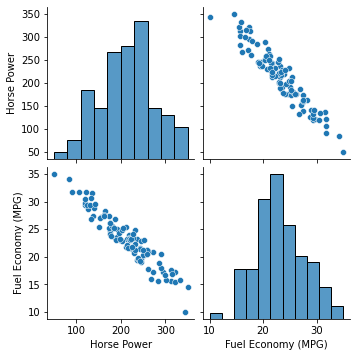

In [10]:
sns.pairplot(fuel_consumption)

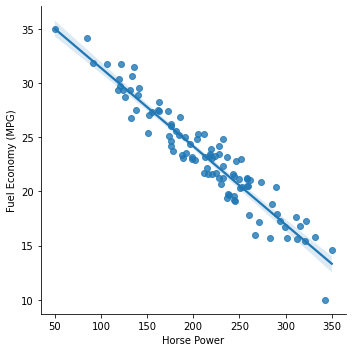

In [11]:
sns.lmplot(x='Horse Power',y='Fuel Economy (MPG)',data=fuel_consumption)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = fuel_consumption[['Horse Power']]
y = fuel_consumption['Fuel Economy (MPG)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
X_train.shape

(67, 1)

In [15]:
y_train.shape

(67,)

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train,y_train)

LinearRegression()

In [18]:
y_predict=regressor.predict(X_test)

In [19]:
print(f'm is {regressor.coef_}')
print(f'b is {regressor.intercept_}')

m is [-0.0729523]
b is 38.83461519425592


Text(0.5, 1.0, 'Horse Power vs MPG for training dataset')

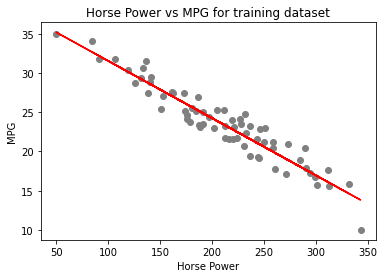

In [20]:
plt.scatter(X_train,y_train,color = 'gray')
plt.plot(np.array(X_train),regressor.predict(X_train),color='red')
plt.xlabel('Horse Power')
plt.ylabel('MPG')
plt.title('Horse Power vs MPG for training dataset')

Text(0.5, 1.0, 'Horse Power vs MPG for testing dataset')

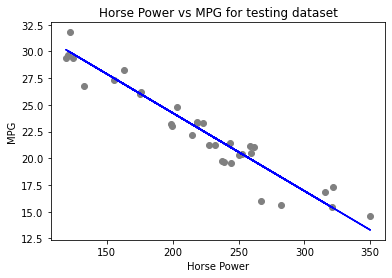

In [21]:
plt.scatter(X_test,y_test,color = 'gray')
plt.plot(np.array(X_test),regressor.predict(X_test),color='blue')
plt.xlabel('Horse Power')
plt.ylabel('MPG')
plt.title('Horse Power vs MPG for testing dataset')

In [22]:
HP =[[150]]
regressor.predict(HP)

C:\Users\Vadiraj R Adabaddi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27.89177047])

In [23]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

In [24]:
n = len(X_test)
k = X_test.shape[1]

In [25]:
MAE = mean_absolute_error(y_test,y_predict)
MAPE = mean_absolute_percentage_error(y_test,y_predict)
MSE = mean_squared_error(y_test,y_predict)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test,y_predict)
adj_r2 = 1 - ((n-1)*(1-r2)/(n-k-1))

In [26]:
print('MAE=',MAE,'\nMAPE=',MAPE,'\nMSE=',MSE,'\nRMSE=',RMSE,'\nr2=',r2,'\nadj_r2=',adj_r2)

MAE= 1.0349466267868217 
MAPE= 0.05055052766559435 
MSE= 1.6857993943662404 
RMSE= 1.2983833772681475 
r2= 0.9141859727599229 
adj_r2= 0.9114177783328236
